#Gradient Symbolic Computation  

##Paul Smolensky and Matt Goldrick
> ### <em>with the essential help of</em>  

##Nicholas Becker and Pyeong Whan Cho
###LSA 2015 Summer Linguistic Institute, University of Chicago

<font; color="red">
# Class 4A (Thursday, July 16, 2015) 
# Quantization: How to be discrete

<font; color='blue'>
##Optima of grammatical Harmony can be catastrophic blends

<font; color='black'><p>
These are *robust* blends that are not clearly cognitively desirable -- as opposed to *marginal blends*, which are nearly discrete, and are often useful rather than problematic (as we saw with incomplete neutralization in Class 3).</p>

¿ How should Figure 3-1 be ammended in order to encode the full HNF grammar 

$${\cal G}_0 :\ {\tt S \rightarrow S[1]\ |\ S[2];\ S[1]\ \rightarrow\ A\ A;\ S[2]\ \rightarrow\ B\ B}$$

<img src="class-4_images/Fig_4-1.png" style="width: 800px;">

For the full grammar ${\cal G}_0$, compare the Grammatical Harmony of the grammatical tree  $'\tt S \ (S[1] \ \ (A \ A))'$ with that of the blend $'\tt 2*S\ \ (S[1]+S[2] \ \ (A+B\ \ A+B))'$.  
Which has higher Harmony and why?  

In [3]:
%matplotlib inline
%run ../../code/grammar
from matplotlib import pyplot as plt  # For plotting

def printAllRules(gram):
    print('CNF:\n' + gram.cnfRulesToString() + '\n')
    print('HNF:\n' + gram.hnfRulesToString() + '\n')
    print('HG rules:\n' + gram.hgRulesToString() + '\n')
#gram0 = Grammar('S1 -> A A; S2 -> B B')
gram0 = Grammar('S -> S[1] | S[2]; S[1] -> A A; S[2] -> B B', isHnf=True)
printAllRules(gram0)

CNF:
{S -> A A; 
 S -> B B}

HNF:
{S -> S[1]; 
 S -> S[2]; 
 S[1] -> A A; 
 S[2] -> B B}

HG rules:
{[(S/r, S[1]/0r), 2];
 [(S/r, S[2]/0r), 2];
 [(S[1]/0r, A/00r), 2];
 [(S[1]/0r, A/10r), 2];
 [(S[2]/0r, B/00r), 2];
 [(S[2]/0r, B/10r), 2];
 [r, -1]; 
 [0r, -3]; 
 [00r, -1]; 
 [10r, -1]}



In [4]:
state1 = gram0.hnfTreeToState('S (S[1] (A A))')
print("state1 = \'S (S[1] (A A))\'")
print("state1 =", state1)
#len(state1)               # = 24; 4 roles x 6 fillers (includes null filler)
print("H_0(state1) =", gram0.getHarmony(state1))

state2 = gram0.hnfTreeToState('S (S[2] (B B))') 
print("state2 = \'S (S[2] (B B))\'")
print("state2 =", state2)
print("H_0(state2) =", gram0.getHarmony(state2))

state1 = 'S (S[1] (A A))'
state1 = [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
H_0(state1) = 0.0
state2 = 'S (S[2] (B B))'
state2 = [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
H_0(state2) = 0.0


In [5]:
# isinstance(state1, np.ndarray)                # Check if state1 is an instance of the numpy array object.

stateBlend1 =  state1 + state2  # stateBlend1 = '2*S (S[1]+S[2] (A+B  A+B))'
print("stateBlend1 = \'2*S (S[1]+S[2] (A+B  A+B))\'")
print("stateBlend1 =", stateBlend1)       # = 4; stateBlend1 is more harmonious than a discrete tree
print("H0 of stateBlend1 =", gram0.getHarmony(stateBlend1))
print("stateBlend1's core Harmony (H0) is greater than that of a grammatical discrete tree (0)\n")

stateBlend0 = 0.5 * stateBlend1 # stateBlend0 = 'S (0.5*S[1]+0.5*S[2] (0.5*A+0.5*B  0.5*A+0.5*B))'
print("stateBlend0 = \'S (0.5*S[1]+0.5*S[2] (0.5*A+0.5*B  0.5*A+0.5*B))\'")
print("stateBlend0 =", stateBlend0)
print("H0 of stateBlend0 =", gram0.getHarmony(stateBlend0))   
print("stateBlend0's core Harmony (H0) is less than that of a grammatical discrete tree (0)\n")


stateBlend1 = '2*S (S[1]+S[2] (A+B  A+B))'
stateBlend1 = [2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0]
H0 of stateBlend1 = 4.0
stateBlend1's core Harmony (H0) is greater than that of a grammatical discrete tree (0)

stateBlend0 = 'S (0.5*S[1]+0.5*S[2] (0.5*A+0.5*B  0.5*A+0.5*B))'
stateBlend0 = [ 1.   0.   0.   0.   0.   0.   0.   0.5  0.5  0.   0.   0.   0.   0.   0.
  0.5  0.5  0.   0.   0.   0.   0.5  0.5  0. ]
H0 of stateBlend0 = -2.0
stateBlend0's core Harmony (H0) is less than that of a grammatical discrete tree (0)



The Unit Harmony function $H_1$ ("the bowl") is designed to ensure that as ${\bf x} \rightarrow \infty$, we get $H_{\cal G}({\bf x}) \equiv H_0({\bf x}) + H_1({\bf x}) \rightarrow - \infty$. 
To achieve this, we set$^\dagger$, for ${\bf x} \in R^N$,
$$H_1({\bf x}) \equiv - \frac{1}{2} \beta \| {\bf x} \|^2 + \beta N / 8$$
where $\| {\bf x} \|^2 \equiv \sum_{k=1}^N (x_k)^2$; we must set $\beta$ sufficiently large$^*$ that $H_1({\bf x}) \rightarrow -\infty$ faster than $H_0({\bf x}) \rightarrow +\infty$ (as it typically does). 
> $^\dagger$ Although adding a constant to the Harmony of all states has no effect (it does not change which state is optimal, nor does it change the relative probability of states), here we add a constant for convenience: it ensures that if the activation values $x_k$ in ${\bf x}$ are all either 0 or 1, then $H_1({\bf x}) = 0$.

> $^*$ How large $\beta$ must be to ensure this is something we will return to; but the larger the weights figuring into $H_0$, the larger $\beta$ has to be.

In [6]:
def H_1(state):   # bowl function
    beta = 3.0
    return -0.5*beta*(state - 0.5).dot(state - 0.5) + beta*len(state)/8

def H_g(gram, state):
    return gram.getHarmony(state) + H_1(state)

#print("stateBlend0 = \'S (0.5*S[1]+0.5*S[2] (0.5*A+0.5*B  0.5*A+0.5*B))\'")
#print("stateBlend0 = ", stateBlend0)
#H0b = gram0.getHarmony(stateBlend0)
#print("H0 of stateBlend0 = %.3f" % H0b)   # = -2; In terms of H0b, stateBlend0 is less harmonious than either state1 or state2.

print("H_1(state1) =", H_1(state1))
print("H_1(stateBlend1) =", H_1(stateBlend1))        
print("H_1(stateBlend0) =", H_1(stateBlend0))        

print("\nH_g(state1) =", H_g(gram0, state1))
print("H_g(stateBlend1) =", H_g(gram0, stateBlend1)) 
print("H_g(stateBlend0) =", H_g(gram0, stateBlend0)) 

# When beta is greater than a certain value, stateBlend0 is more harmonious than state1 or state2 in terms of H_g.

H_1(state1) = 0.0
H_1(stateBlend1) = -3.0
H_1(stateBlend0) = 2.25

H_g(state1) = 0.0
H_g(stateBlend1) = 1.0
H_g(stateBlend0) = 0.25


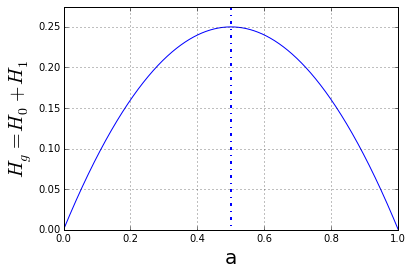

Among the line of states between discrete states tree1 and tree2, 
the optimum is a 50/50 blend of the two discrete trees (stateBlend0)


In [7]:
# Blend states are better than pure states
agrid = np.linspace(0, 1, 1000)     # create a sequence of activation values: x-axis values for plotting 
hvals_blend = np.zeros(agrid.size)  # In this case, first you need to create a storage to save the harmony values. 
                                    # because agrid is a numpy array object, you can use the size method to get the number of elements in agrid
for i, a in enumerate(agrid):
    currStateBlend = (1-a) * state1 + a * state2
    hvals_blend[i] = H_g(gram0, currStateBlend)
hvalsMax = max(hvals_blend)
hvalsMin = min(hvals_blend)
plt.plot(agrid, hvals_blend)
plt.ylabel('$H_g = H_0 + H_1$', fontsize=20)
plt.xlabel('a', fontsize=20)
plt.ylim(hvalsMin - 0.1*abs(hvalsMin), hvalsMax + 0.1*abs(hvalsMax))
plt.grid()
plt.plot([0.5, 0.5], [-10, 10], linewidth=2, color="blue", linestyle="-.")

plt.show()

print("Among the line of states between discrete states tree1 and tree2, \nthe optimum is a 50/50 blend of the two discrete trees (stateBlend0)")
# a=0 (pure tree 1) ---- a blend of A and B with weights of (1-a, a) --- a=1 (pure tree 2)

In [7]:
#stateBlend1 = [2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]  # the LIST encoding of: 2S (S[1]+S[2] (A+B    A+B))
#print(stateBlend1)         # a LIST is comma-separated
#stateBlend1Array = np.asarray(stateBlend1)
#print(stateBlendArray1)    # an ARRAY is blank-separated

#Quantization Harmony

$$H_Q^0(a) \equiv  - {a^2}{(1 - a)^2}$$

$${H_Q}\left( {\sum\nolimits_r {\sum\nolimits_f {{a_{f/r}}{\bf{f}} \otimes {\bf{r}}} } } \right) \equiv \sum\nolimits_r {\sum\nolimits_f {H_Q^0({a_{f/r}})} }  + \sum\nolimits_r {H_Q^1\left( {\left[ {\sum\nolimits_f {{a_{f/r}}{\bf{f}}} } \right] \otimes {\bf{r}}} \right)} $$

$$H_Q^1\left( {\left[ {\sum\nolimits_f {{a_{f/r}}{\bf{f}}} } \right] \otimes {\bf{r}}} \right) \equiv  - {\left( {\left[ {\sum\nolimits_f {{{({a_{f/r}})}^2}} } \right] - 1} \right)^2}$$

<img src="class-4_images/Fig_4-2.png" style="width: 800px;">

In the Total Harmony $H \equiv H_g + q H_{\cal Q} \equiv H_0 + H_1 + q H_{\cal Q}$, the Quantization Harmony is weighted by a factor $q$, which typically grows during the computation, so that by the end, $H_{\cal Q}$ dominates the other terms and prevails in determining where the optima are: on the grid, where $H_{\cal Q}$ is maximal (at value 0).

##Devoicing with Quantization

Grammatical constraints:

> FAITH(voice): The $\pm$ value of the feature [voice] of a segment in the output must be the same as the value of the [voice] feature in the corresponding input segment.

> MARK(voice): No [+voice] obstruent output segments in syllable coda position.

In [8]:
%matplotlib inline
# http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-inline-matplotlib-graphics
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optim

Let: $\hspace{.1in} a \in (0, 1) \equiv$ activity of output [+voice]; $\hspace{.1in} u \in \{-1, 1\} \equiv$ underlying /$\mp$voice/ value; $\hspace{.1in} w_F$, $w_M \equiv$ weights of Faithfulness, Markedness:

Define total Harmony for the devoicing example as in Class 3, but with Quantization: $H^{voi} \equiv H^{voi}_0 + H_{1} +qH_\cal{Q}$ where: 

$\hspace{.25in} H^{voi}_0 \equiv w_F u a - \frac{1}{2} w_M a^2$ is the Harmonic Grammar value (Harmony from the 2 constraints, with *quadratic Mark*),

$\hspace{.25in} H_1 \equiv -\frac{1}{2} \beta (a - \frac{1}{2})^2 + \frac{\beta}{8}$ is the "Unit Harmony" (or "the bowl"); $\beta \equiv 1$, and 

$\hspace{.25in} H_{\cal Q} \equiv - a^2 (1 - a)^2$ is the "Quantization Harmony"

In [9]:
#def h_voi_0(a, uf=1, w_M=1, w_F=1):     # H_0 for devoicing example, with linear Mark: Harmonic Grammar value
      # a: activity of output [voice] for coda C (an "obstruent") 
    # KEYWORD ARGUMENTS:
        # uf:  'underlying form'; input value /voice/ = 1 or -1
        # w_F: strength of faithfulness constraint between /voice/ and [voice] for C 
        # w_M: strength of markedness constraint */+voice/ for C
#    return w_F * uf * a - w_M * a 
def h_voi_0(a, uf, w_M=0, w_F=0):     # H_0 for devoicing example, with quadratic Mark: Harmonic Grammar value
    return w_F * uf * a - 0.5 * w_M * a**2 
def h_1(a): 
    beta = 1
    return -0.5 * beta * (a - 0.5)**2 + beta / 8
def h_Q(a):
    return -a**2 * (1 - a)**2
def h_voi(a, uf=1, w_M=1, w_F=1, q=0):
    # KEYWORD ARGUMENTS:
        # uf:  'underlying form'; input value /voice/ = 1 or -1
        # w_F: strength of faithfulness constraint between /voice/ and [voice] for C 
        # w_M: strength of markedness constraint */+voice/ for C
        # q:   relative strength of Q ('quantization': coming in Class 4)
    H_0 = h_voi_0(a, uf, w_M, w_F)        
    H_1 = h_1(a)
    H_Q = h_Q(a)
    return H_0 + H_1 + q * H_Q

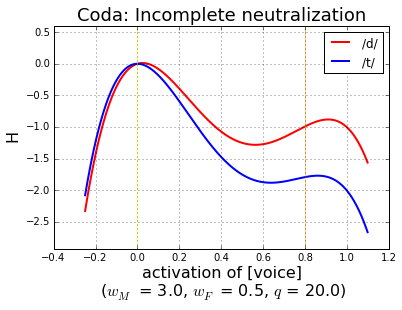

In [10]:
# Incomplete neutralization of obstruent-coda [voice]; "dutch"

w_M_dutch = 3.0     # markedness weight
w_F_dutch = 0.5     # faithfulness weight
                    # above produces grammatical devoicing since w_M > w_F
q_0       = 20.0     # the relative strength of Q 

agrid = np.linspace(-0.25, 1.1, 1000)                                 # create a sequence of activation values: x-axis values for plotting 
hvals_d = h_voi(agrid, uf=1,  w_M=w_M_dutch, w_F=w_F_dutch, q=q_0)   # Harmony values when the underlying form is /+voice/ for C: /d/
hvals_t = h_voi(agrid, uf=-1, w_M=w_M_dutch, w_F=w_F_dutch, q=q_0)   # Harmony values when the underlying form is /-voice/ for C: /t/ 
#print(hvals1)
# Make a Harmony plot
hvalsMax = max(max(hvals_d), max(hvals_t), .5)
hvalsMin = min(min(hvals_blend), min(hvals_t), -1)
#print(hvalsMax, hvalsMin)
plt.ylim(hvalsMin - 0.1*abs(hvalsMin), hvalsMax + 0.2*abs(hvalsMax))
plt.plot(agrid, hvals_d, label=r"/d/", linewidth=2, color="red")
plt.plot(agrid, hvals_t, label=r"/t/", linewidth=2, color="blue")
plt.title("Coda: Incomplete neutralization", fontsize=18)
plt.xlabel("activation of [voice]\n ($w_M$ = %.1f, $w_F$ = %.1f, $q$ = %.1f)" % (w_M_dutch, w_F_dutch, q_0), fontsize=16)
plt.ylabel("H", fontsize=16)
plt.legend()
plt.grid()
initial_guess_1 = 0.8
initial_guess_2 = 0
plt.plot([initial_guess_1, initial_guess_1], [-10, 10], linewidth=0.5, color="orange")
plt.plot([initial_guess_2, initial_guess_2], [-10, 10], linewidth=0.5, color="yellow")

In [11]:
# scipy.optimize = "optim" provides many algorithms for optimization and root finding. 
# see: http://docs.scipy.org/doc/scipy/reference/optimize.html

# First, try local optimization with minimize(). 
# This optimization algorithm tries to minimize (not maximize) a function. 
# So let us find a (local) minimum of NEGATIVE Harmony instead of a maximum of Harmony.
# The algorithm finds a LOCAL minimum. May need to run it multiple times with different random initial guesses.

# res.x is the value of argument a at which Harmony is maximal.
# res.fun contains the value of the function at the local minimum found by optim.minimize() 
# -res.fun is the value of the local maximum of Harmony.

res_d = optim.minimize(lambda x: -h_voi(x, 1, w_M_dutch, w_F_dutch, q_0), initial_guess_1)      # (lambda x: ...) is an unnamed function of x;  
res_t = optim.minimize(lambda x: -h_voi(x, -1, w_M_dutch, w_F_dutch, q_0), initial_guess_1)      # here uf = -1 i.e. /-voice/: /t/
                                                                                                # uf = 1 i.e. /+voice/: /d/; res[ult]_d is an object 
print("Optimization by \'optim.minimize\' with initial guess =", initial_guess_1)
print("Total Harmony for /d/ (red)  is maximal (%.3f) at a = %.3f" % (-res_d.fun, res_d.x))
print("Total Harmony for /t/ (blue) is maximal (%.3f) at a = %.3f" % (-res_t.fun, res_t.x))
#print()
#print("Harmonic Grammar value for optimal output activity level (%.3f) for /d/ (red)  is %.3f" % (res_d.x, h_voi_0(res_d.x, 1,  w_M_dutch, w_F_dutch)))
#print("Harmonic Grammar value for optimal output activity level (%.3f) for /t/ (blue) is %.3f" % (res_t.x, h_voi_0(res_t.x, -1, w_M_dutch, w_F_dutch)))

res_d = optim.minimize(lambda x: -h_voi(x, 1, w_M_dutch, w_F_dutch, q_0), initial_guess_2)      # (lambda x: ...) is an unnamed function of x;  
res_t = optim.minimize(lambda x: -h_voi(x, -1, w_M_dutch, w_F_dutch, q_0), initial_guess_2)      # here uf = -1 i.e. /-voice/: /t/
                                                                                                # uf = 1 i.e. /+voice/: /d/; res[ult]_d is an object 
print("\nOptimization by \'optim.minimize\' with initial guess =", initial_guess_2)
print("Total Harmony for /d/ (red)  is maximal (%.3f) at a = %.3f" % (-res_d.fun, res_d.x))
print("Total Harmony for /t/ (blue) is maximal (%.3f) at a = %.3f" % (-res_t.fun, res_t.x))
print("Note that the optimal a value for /t/ is 0, for /d/ is > 0  --> Incomplete neutralization!")
#print()
#print("Harmonic Grammar value for optimal output activity level (%.3f) for /d/ (red)  is %.3f" % (res_d.x, h_voi_0(res_d.x, 1,  w_M_dutch, w_F_dutch)))
#print("Harmonic Grammar value for optimal output activity level (%.3f) for /t/ (blue) is %.3f" % (res_t.x, h_voi_0(res_t.x, -1, w_M_dutch, w_F_dutch)))


Optimization by 'optim.minimize' with initial guess = 0.8
Total Harmony for /d/ (red)  is maximal (-0.880) at a = 0.912
Total Harmony for /t/ (blue) is maximal (-1.769) at a = 0.862

Optimization by 'optim.minimize' with initial guess = 0
Total Harmony for /d/ (red)  is maximal (0.012) at a = 0.024
Total Harmony for /t/ (blue) is maximal (0.000) at a = 0.000
Note that the optimal a value for /t/ is 0, for /d/ is > 0  --> Incomplete neutralization!


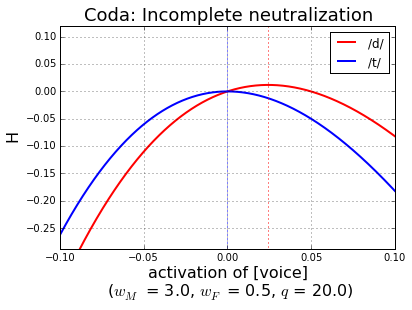

In [12]:
# Incomplete neutralization of obstruent-coda [voice]; "dutch" -- zooming in on region of optima

agrid = np.linspace(-0.1, 0.1, 1000)                               # create a sequence of activation values: x-axis values for plotting 
plt.xlim(-0.1, 0.1)
hvals_d = h_voi(agrid, uf=1,  w_M=w_M_dutch, w_F=w_F_dutch, q=q_0)   # Harmony values when the underlying form is /+voice/ for C: /d/
hvals_t = h_voi(agrid, uf=-1, w_M=w_M_dutch, w_F=w_F_dutch, q=q_0)   # Harmony values when the underlying form is /-voice/ for C: /t/ 
# Make a Harmony plot
hvalsMax = max(max(hvals_d), max(hvals_t), .1)
hvalsMin = min(min(hvals_blend), min(hvals_t))
plt.ylim(hvalsMin - 0.1*abs(hvalsMin), hvalsMax + 0.2*abs(hvalsMax))
plt.plot(agrid, hvals_d, label=r"/d/", linewidth=2, color="red")
plt.plot(agrid, hvals_t, label=r"/t/", linewidth=2, color="blue")
plt.title("Coda: Incomplete neutralization", fontsize=18)
plt.xlabel("activation of [voice]\n ($w_M$ = %.1f, $w_F$ = %.1f, $q$ = %.1f)" % (w_M_dutch, w_F_dutch, q_0), fontsize=16)
plt.ylabel("H", fontsize=16)
plt.legend()
plt.grid()
plt.plot([res_d.x, res_d.x], [-10, 10], linewidth=1, color="red", linestyle=":")
plt.plot([res_t.x, res_t.x], [-10, 10], linewidth=1, color="blue", linestyle=":")

In [13]:
# scipy.optimize provides several algorithms for global optimization.
# Try global optimiztion with basinhopping.
# see: http://docs.scipy.org/doc/scipy/reference/optimize.html
initial_guess = initial_guess_1 # Remember that this value was not good for minimize()
res_d_1 = optim.basinhopping(lambda x: -h_voi(x,  1, w_M_dutch, w_F_dutch, q_0), initial_guess)
print(res_d_1) # Print the optimization result
print()
res_t_1 = optim.basinhopping(lambda x: -h_voi(x, -1, w_M_dutch, w_F_dutch, q_0), initial_guess)
print(res_t_1) # Print the optimization result
print("\nOptimization with \'optim.basinhopping\', with initial guess", initial_guess_1)
print("which was problematic for \'optim.minimize\':")
print("Total harmony for /d/ (red)  is maximal (%.3f) at a = %.3f" % (-res_d_1.fun, res_d_1.x))
print("Total harmony for /t/ (blue) is maximal (%.3f) at a = %.3f" % (-res_t_1.fun, res_t_1.x))

                     x: array([ 0.02431334])
                  njev: 930
               message: ['requested number of basinhopping iterations completed successfully']
 minimization_failures: 2
                  nfev: 2819
                   fun: -0.01187620611781268
                   nit: 100

                     x: array([ -4.48638725e-10])
                  njev: 953
               message: ['requested number of basinhopping iterations completed successfully']
 minimization_failures: 0
                  nfev: 2859
                   fun: -1.7071144183651332e-17
                   nit: 100

Optimization with 'optim.basinhopping', with initial guess 0.8
which was problematic for 'optim.minimize':
Total harmony for /d/ (red)  is maximal (0.012) at a = 0.024
Total harmony for /t/ (blue) is maximal (0.000) at a = -0.000


#Error intrusion

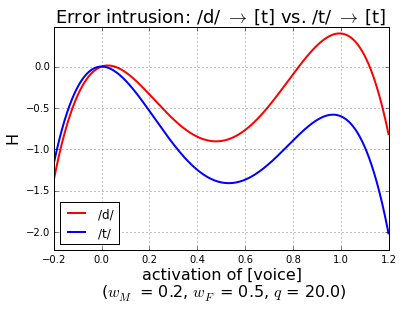

In [14]:
# Error intrusion

w_M_engl = 0.2    # markedness weight   (dutch was 3.0)
w_F_engl = 0.5    # faithfulness weight (same as dutch)
                  # above does not produce grammatical devoicing since w_M < w_F
q_0 = 20          # the relative strength of Q

agrid = np.linspace(-0.2, 1.2, 1000)   # create a sequence of activation values 
hvals_d = h_voi(agrid,  1, w_M_engl, w_F_engl, q_0)    # harmony values when an underlying form is /+voice/ for C
hvals_t = h_voi(agrid, -1, w_M_engl, w_F_engl, q_0)    # harmony values when an underlying form is /-voice/ for C (Note: -w_F was used instead of w_F)

# Make a plot
hvalsMax = max(max(hvals_d), max(hvals_t), .1)
hvalsMin = min(min(hvals_blend), min(hvals_t))
plt.ylim(hvalsMin - 0.1*abs(hvalsMin), hvalsMax + 0.2*abs(hvalsMax))

plt.plot(agrid, hvals_d, label="/d/", linewidth=2, color="red")
plt.plot(agrid, hvals_t, label="/t/", linewidth=2, color="blue")
plt.title(r"Error intrusion: /d/ $\rightarrow$ [t] vs. /t/ $\rightarrow$ [t]", fontsize=18)
plt.xlabel("activation of [voice]\n ($w_M$ = %.1f, $w_F$ = %.1f, $q$ = %.1f)" % (w_M_engl, w_F_engl, q_0), fontsize=16)
plt.ylabel("H", fontsize=16)
plt.legend(loc=3)
plt.grid()

In [15]:
# We are investigating errors which correspond to LOCAL (and not global) maximum around 0 for the red curve and 1 for the blue.
# Thus, we need to do local optimization. Because the /d/ local optima is near 0,
initial_guess_t = -0.1
res_t_for_d = optim.minimize(lambda x: -h_voi(x, 1,  w_M_engl, w_F_engl, q_0), initial_guess_t)
res_t_for_t = optim.minimize(lambda x: -h_voi(x, -1, w_M_engl, w_F_engl, q_0), initial_guess_t)
print(res_t_for_d) # Print the optimization result
print()
print(res_t_for_t)
print("\nTotal harmony of [t] for /d/ (red)  is locally  maximal (%.3f) at a = %.3f" % (-res_t_for_d.fun, res_t_for_d.x))
print(  "Total harmony of [t] for /t/ (blue) is globally maximal (%.3f) at a = %.3f" % (-res_t_for_t.fun, res_t_for_t.x))

initial_guess_d = 1.1
res_d_for_d = optim.minimize(lambda x: -h_voi(x, 1,  w_M_engl, w_F_engl, q_0), initial_guess_d)
res_d_for_t = optim.minimize(lambda x: -h_voi(x, -1, w_M_engl, w_F_engl, q_0), initial_guess_d)
print(res_d_for_d) # Print the optimization result
print()
print(res_d_for_t)
print("\nTotal harmony of [d] for /d/ (red)  is globally maximal (%.3f) at a = %.3f" % (-res_d_for_d.fun, res_d_for_d.x))
print(  "Total harmony of [d] for /t/ (blue) is locally  maximal (%.3f) at a = %.3f" % (-res_d_for_t.fun, res_d_for_t.x))

  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([ -2.79396772e-09])
 hess_inv: array([[ 0.02852261]])
      fun: -0.012769332942846826
        x: array([ 0.02624259])
     njev: 10
     nfev: 30

  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([  1.20967480e-06])
 hess_inv: array([[ 0.02433724]])
      fun: 9.881861640282653e-15
        x: array([  2.18994836e-08])
     njev: 8
     nfev: 24

Total harmony of [t] for /d/ (red)  is locally  maximal (0.013) at a = 0.026
Total harmony of [t] for /t/ (blue) is globally maximal (-0.000) at a = 0.000
  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([ 0.])
 hess_inv: array([[ 0.02498164]])
      fun: -0.4004901007174025
        x: array([ 0.99507521])
     njev: 9
     nfev: 27

  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([  7.45058060e-09])
 hess

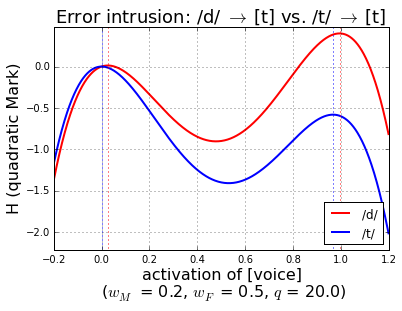

In [16]:
# Add vertical lines with the a values
plt.plot(agrid, hvals_d, label=r"/d/", linewidth=2, color="red")
plt.plot(agrid, hvals_t, label=r"/t/", linewidth=2, color="blue")
plt.plot([res_t_for_d.x, res_t_for_d.x], [-10, 10], linewidth=1, color="red", linestyle=":")
plt.plot([res_t_for_t.x, res_t_for_t.x], [-10, 10], linewidth=1, color="blue", linestyle=":")
plt.plot([res_d_for_d.x, res_d_for_d.x], [-10, 10], linewidth=1, color="red", linestyle=":")
plt.plot([res_d_for_t.x, res_d_for_t.x], [-10, 10], linewidth=1, color="blue", linestyle=":")
#plt.plot([0, 0], [-10, 10], linewidth=1, color="green", linestyle=":")
plt.title(r"Error intrusion: /d/ $\rightarrow$ [t] vs. /t/ $\rightarrow$ [t]", fontsize=18)
plt.xlabel("activation of [voice]\n ($w_M$ = %.1f, $w_F$ = %.1f, $q$ = %.1f)" % (w_M_engl, w_F_engl, q_0), fontsize=16)
plt.ylabel("H (quadratic Mark)", fontsize=16)
plt.ylim(hvalsMin - 0.1*abs(hvalsMin), hvalsMax + 0.2*abs(hvalsMax))
plt.legend(loc=4)
plt.grid()

In [17]:
# Redefine H_M as linear (not quadratic)
def h_voi_0(a, uf, w_M=0, w_F=0):     # H_0 for devoicing example, with linear Mark: Harmonic Grammar value
    return w_F * uf * a - w_M * a 

# We are investigating errors which correspond to LOCAL (and not global) maximum around 0 for the red curve and 1 for the blue.
# Thus, we need to do local optimization. Because the /d/ local optima is near 0,
initial_guess_t = -1
res_t_for_d = optim.minimize(lambda x: -h_voi(x, 1,  w_M_engl, w_F_engl, q_0), initial_guess_t)
res_t_for_t = optim.minimize(lambda x: -h_voi(x, -1, w_M_engl, w_F_engl, q_0), initial_guess_t)
print(res_t_for_d) # Print the optimization result
print()
print(res_t_for_t)
print("\nTotal harmony of [t] for /d/ (red)  is locally  maximal (%.3f) at a = %.3f" % (-res_t_for_d.fun, res_t_for_d.x))
print(  "Total harmony of [t] for /t/ (blue) is globally maximal (%.3f) at a = %.3f" % (-res_t_for_t.fun, res_t_for_t.x))

initial_guess_d = 2
res_d_for_d = optim.minimize(lambda x: -h_voi(x, 1,  w_M_engl, w_F_engl, q_0), initial_guess_d)
res_d_for_t = optim.minimize(lambda x: -h_voi(x, -1, w_M_engl, w_F_engl, q_0), initial_guess_d)
print(res_d_for_d) # Print the optimization result
print()
print(res_d_for_t)
print("\nTotal harmony of [d] for /d/ (red)  is globally maximal (%.3f) at a = %.3f" % (-res_d_for_d.fun, res_d_for_d.x))
print(  "Total harmony of [d] for /t/ (blue) is locally  maximal (%.3f) at a = %.3f" % (-res_d_for_t.fun, res_d_for_t.x))

  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([  5.21540642e-08])
 hess_inv: array([[ 0.02512783]])
      fun: -0.3004925382422766
        x: array([ 0.99505048])
     njev: 13
     nfev: 39

  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([  1.04308128e-07])
 hess_inv: array([[ 0.0298645]])
      fun: 0.6813012349887146
        x: array([ 0.96775375])
     njev: 13
     nfev: 39

Total harmony of [t] for /d/ (red)  is locally  maximal (0.300) at a = 0.995
Total harmony of [t] for /t/ (blue) is globally maximal (-0.681) at a = 0.968
  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([ -1.81840733e-07])
 hess_inv: array([[ 0.02770964]])
      fun: -0.008127128512756076
        x: array([ 0.0207556])
     njev: 13
     nfev: 39

  success: True
  message: 'Optimization terminated successfully.'
   status: 0
      jac: array([ -6.11180440e-09])


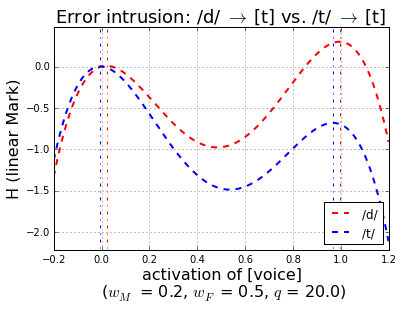

In [18]:
agrid = np.linspace(-0.2, 1.2, 1000)   # create a sequence of activation values 
hvals_d = h_voi(agrid,  1, w_M_engl, w_F_engl, q_0)    # harmony values when an underlying form is /+voice/ for C
hvals_t = h_voi(agrid, -1, w_M_engl, w_F_engl, q_0)    # harmony values when an underlying form is /-voice/ for C (Note: -w_F was used instead of w_F)

# Make a plot
#hvalsMax = max(max(hvals_d), max(hvals_t), .1)
#hvalsMin = min(min(hvals_blend), min(hvals_t))
#plt.ylim(hvalsMin - 0.1*abs(hvalsMin), hvalsMax + 0.2*abs(hvalsMax))

plt.plot(agrid, hvals_d, label=r"/d/", linewidth=2, color="red", linestyle="--")
plt.plot(agrid, hvals_t, label=r"/t/", linewidth=2, color="blue", linestyle="--")
plt.plot([res_t_for_d.x, res_t_for_d.x], [-10, 10], linewidth=1, color="red", linestyle="-.")
plt.plot([res_t_for_t.x, res_t_for_t.x], [-10, 10], linewidth=1, color="blue", linestyle="-.")
plt.plot([res_d_for_d.x, res_d_for_d.x], [-10, 10], linewidth=1, color="red", linestyle="-.")
plt.plot([res_d_for_t.x, res_d_for_t.x], [-10, 10], linewidth=1, color="blue", linestyle="-.")
#plt.plot([0, 0], [-10, 10], linewidth=1, color="green", linestyle=":")
plt.title(r"Error intrusion: /d/ $\rightarrow$ [t] vs. /t/ $\rightarrow$ [t]", fontsize=18)
plt.xlabel("activation of [voice]\n ($w_M$ = %.1f, $w_F$ = %.1f, $q$ = %.1f)" % (w_M_engl, w_F_engl, q_0), fontsize=16)
plt.ylabel("H (linear Mark)", fontsize=16)
plt.ylim(hvalsMin - 0.1*abs(hvalsMin), hvalsMax + 0.2*abs(hvalsMax))
plt.legend(loc=4)
plt.grid()

Superimposing the quadratic and linear Markedness cases:
<img src="class-4_images/Error_intrusion_superposition.png" style="width: 1600px;">